In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
width = 50
height = 10
channels = 3
classes = 5
dataset_dir = '/data/user/adipilat/ParticleID/genEvts/new_datasets/padded/'
sample_dir = '/data/user/adipilat/ParticleID/sample_images/'
padding = 'padding' + str(height)
class_labels = {22:'γ', 11:'e$^{-}$', 13:'μ$^{-}$', 211:'π$^{+}$', -1:'incomplete'}

In [7]:
name = 'gamma_aT_Padded.h5'
data = pd.read_hdf(dataset_dir + name)
data.head()

,trackster,layer,x,y,z,phi,eta,E,pt,genE,pid
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
num = 4
track = data[data['trackster'] == num]
img = np.array([track.E.values, track.eta.values, track.phi.values]).T.reshape(width, height, channels)
# img = np.array([track.E.values, track.x_pca.values, track.y_pca.values, track.z_pca.values]).T.reshape(width, height, channels)
pid_val = int(np.unique(track[track['pid'] != 0].pid))
print(pid_val)
category = class_labels[pid_val]
en = np.unique(track[track['genE'] != 0].genE)

-1


Text(0.5,1,'incomplete (E = 367.57 GeV)')

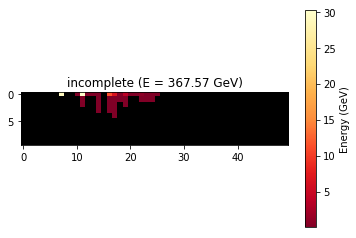

In [19]:
sample = img[:,:,0]
cmap = plt.cm.YlOrRd_r
sample = np.ma.masked_where(sample == 0, sample)
cmap.set_bad(color='black')
plt.imshow(sample.T, cmap=cmap)
plt.colorbar(label="Energy (GeV)")
# print(en)
# print(pid)
plot_title = category + ' (E = ' + str('%.2f'%en) + ' GeV)'
# print(plot_title)
plt.title(plot_title)
# plt.savefig(sample_dir + padding + '_' + str(num) + '.pdf', format='pdf')

In [23]:
print(img)

[[[  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  ...
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]]

 [[  1.06393254 -24.22050476   0.92727766   1.68936143]
  [  0.04049915 -24.06745162  -1.33536102   0.89796999]
  [  0.           0.           0.           0.        ]
  ...
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]]

 [[  2.94628119 -22.12056383   1.07177323   1.80497685]
  [  0.06440029 -22.34131955  -0.49892025  -0.2206281 ]
  [  0.           0.           0.           0.        ]
  ...
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.      